### Importando as bibliotecas necessárias



In [199]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

### Lendo o arquivo com os dados

In [200]:
dados = pd.read_excel('./Dados de estudantes da UFV - 2022-12-12.ods')
dados

KeyboardInterrupt: 

### Verificando as 5 primeiras linhas do DataFrame

In [260]:
dados.head()

,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
0,29271,1982.0,M,CAV,1101,CAV - Administração,RJ,VOLTA REDONDA,2000/1,2000/1,A,Abandono ...,Evasão,0.0,NaN,0,Informação não disponível,0.0
1,29272,1982.0,M,CAV,1101,CAV - Administração,DF,Brasília,2000/1,2002/1,A,Abandono ...,Evasão,0.0,NaN,3,Informação não disponível,71.2
2,34462,1979.0,F,CAV,1101,CAV - Administração,MG,Viçosa,2000/1,2005/1,C,Conclusão ...,Conclusão,0.0,NaN,3,Informação não disponível,78.5
3,34468,1979.0,F,CAV,1101,CAV - Administração,MG,Belo Horizonte,2000/1,2006/1,C,Conclusão ...,Conclusão,0.0,NaN,20,Pardo(a),56.0
4,34470,1980.0,F,CAV,1101,CAV - Administração,SP,São Paulo,2000/1,2004/2,C,Conclusão ...,Conclusão,0.0,NaN,1,Informação não disponível,76.9


### Informação sobre o conteúdo dos dados

In [261]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74026 entries, 0 to 74025
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Identificador            74026 non-null  int64  
 1   Ano_Nascimento           73949 non-null  float64
 2   Sexo                     73986 non-null  object 
 3   Campus                   74026 non-null  object 
 4   Curso_Identificador      74026 non-null  int64  
 5   Curso                    74026 non-null  object 
 6   UF_Nascimento            73971 non-null  object 
 7   Municipio_Nascimento     73990 non-null  object 
 8   Admissao                 74026 non-null  object 
 9   Saida                    74026 non-null  object 
 10  Codigo_Situacao_Aluno    74026 non-null  object 
 11  Situacao_Aluno           74026 non-null  object 
 12  Situacao_Aluno_Agrupada  74026 non-null  object 
 13  Modalidade_Inscrita      68753 non-null  float64
 14  ENEM                  

### Descrição dos dados

In [262]:
dados.describe()

,Identificador,Ano_Nascimento,Curso_Identificador,Modalidade_Inscrita,ENEM,Num_Reprovacoes,CRA
count,7.402600e+04,73949.000000,74026.000000,68753.000000,39183.000000,74026.000000,74016.000000
mean,4.914848e+06,1990.876442,1427.490963,3.457725,629.164453,4.968444,61.882511
std,1.032870e+07,8.366123,653.483918,3.957373,68.806862,5.946912,24.364191
min,5.471000e+03,1900.000000,1101.000000,0.000000,253.240000,0.000000,0.000000
25%,6.667525e+04,1986.000000,1112.000000,0.000000,587.660000,0.000000,51.400000
50%,1.119175e+05,1992.000000,1127.000000,1.000000,634.580000,3.000000,69.600000
75%,1.622678e+05,1997.000000,1149.000000,9.000000,676.260000,7.000000,79.300000
max,3.001076e+07,2022.000000,3112.000000,9.000000,847.380000,93.000000,100.000000


### Verificando a quantidade de dados nulos em cada coluna

In [263]:
dados.isnull().sum()

Identificador                  0
Ano_Nascimento                77
Sexo                          40
Campus                         0
Curso_Identificador            0
Curso                          0
UF_Nascimento                 55
Municipio_Nascimento          36
Admissao                       0
Saida                          0
Codigo_Situacao_Aluno          0
Situacao_Aluno                 0
Situacao_Aluno_Agrupada        0
Modalidade_Inscrita         5273
ENEM                       34843
Num_Reprovacoes                0
Raca                           0
CRA                           10
dtype: int64

### Verificando valores únicos e contagem para cada atributo

In [264]:
for coluna in dados.columns:
    print(f"\n{coluna}\nVariedade: {dados[coluna].nunique()}\nDados: \n{dados[coluna].value_counts()}\n")


Identificador
Variedade: 74026
Dados: 
29271     1
131589    1
129368    1
129365    1
129354    1
         ..
76865     1
76321     1
76309     1
76304     1
172082    1
Name: Identificador, Length: 74026, dtype: int64


Ano_Nascimento
Variedade: 71
Dados: 
1991.0    3803
1995.0    3746
1993.0    3738
1994.0    3737
1996.0    3728
          ... 
1942.0       1
2008.0       1
1943.0       1
2015.0       1
1938.0       1
Name: Ano_Nascimento, Length: 71, dtype: int64


Sexo
Variedade: 2
Dados: 
F    37032
M    36954
Name: Sexo, dtype: int64


Campus
Variedade: 3
Dados: 
CAV    60339
CRP     8413
CAF     5274
Name: Campus, dtype: int64


Curso_Identificador
Variedade: 79
Dados: 
1103    5787
1121    1974
1113    1651
1132    1637
1114    1627
        ... 
1424     243
1154     217
1418     205
2102     160
1423       1
Name: Curso_Identificador, Length: 79, dtype: int64


Curso
Variedade: 93
Dados: 
CAV - Agronomia                                                       5787
CAV - Adminis

### Copiando os dados para um novo DataFrame

In [265]:
df = dados.copy()

### Tratando a coluna 'Ano Nascimento'
- Desscrição da coluna
- Verificando outliers
- Removendo outliers
- Verificando se os outliers foram removidos
- Verificando se possui valores nulos
- Tratando valores nulos
- Distribuição dos dados

#### Desscrição da coluna

In [266]:
df['Ano_Nascimento'].describe()

count    73949.000000
mean      1990.876442
std          8.366123
min       1900.000000
25%       1986.000000
50%       1992.000000
75%       1997.000000
max       2022.000000
Name: Ano_Nascimento, dtype: float64

#### Verificando outliers

<Axes: xlabel='Ano_Nascimento'>

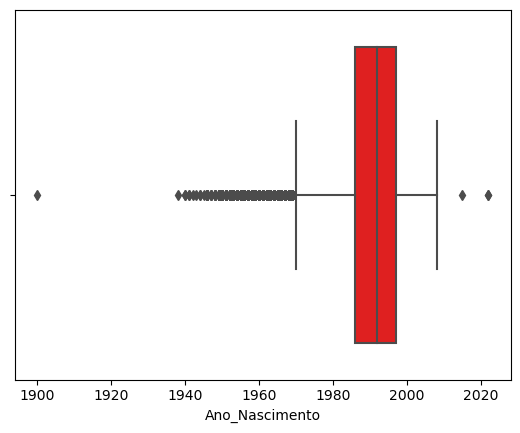

In [267]:
sns.boxplot(x=df['Ano_Nascimento'], color='red')

#### Removendo outliers

In [268]:
# Quantidade de outliers

menor1930 = df[df['Ano_Nascimento'] < 1930].shape[0]
maior2005 = df[df['Ano_Nascimento'] > 2005].shape[0]

print(f"Quantidade de outliers menores que 1930: {menor1930}")
print(f"Quantidade de outliers maiores que 2005: {maior2005}")

# Removendo outliers

df = df.drop(df[df['Ano_Nascimento'] < 1930].index)
df = df.drop(df[df['Ano_Nascimento'] > 2005].index)
print(f"Outliers removidos!")

Quantidade de outliers menores que 1930: 1
Quantidade de outliers maiores que 2005: 4
Outliers removidos!


#### Verificando se os outliers foram removidos

<Axes: xlabel='Ano_Nascimento'>

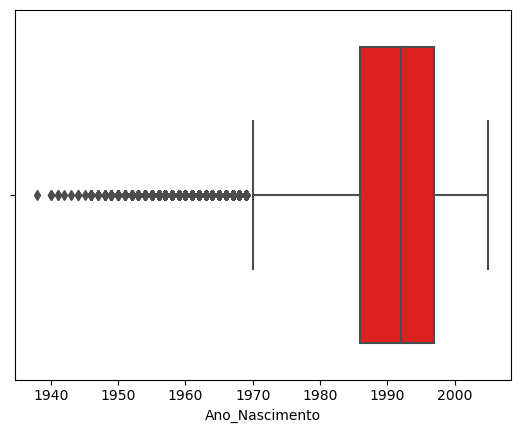

In [269]:
sns.boxplot(x=df['Ano_Nascimento'], color='red')

#### Verificando se possui valores nulos

In [270]:
qtdAnoNascimentoNulos = df['Ano_Nascimento'].isnull().sum()
print(f"Quantidade de valores nulos: {qtdAnoNascimentoNulos}")

Quantidade de valores nulos: 77


#### Tratando valores nulos (substituindo pela média)

In [271]:
df['Ano_Nascimento'].fillna(df['Ano_Nascimento'].mean(), inplace=True)
qtdAnoNascimentoNulos = df['Ano_Nascimento'].isnull().sum()
print(f"Quantidade de valores nulos: {qtdAnoNascimentoNulos}")

Quantidade de valores nulos: 0


#### Distribuição dos dados

<Axes: xlabel='Ano_Nascimento', ylabel='Count'>

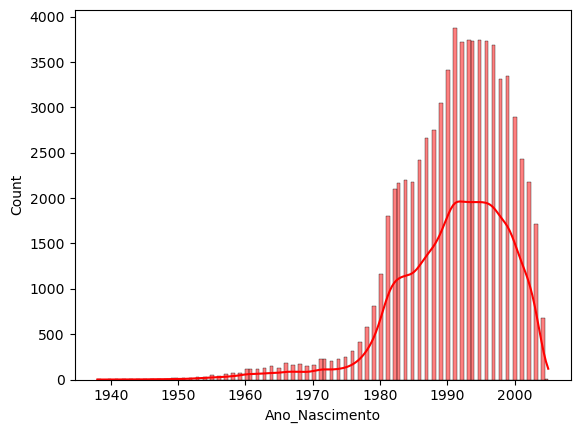

In [272]:
sns.histplot(x=df['Ano_Nascimento'], color='red', kde=True)

### Tratamento da coluna 'Sexo'
- Desscrição da coluna e gráfico de contagem
- Verificando se possui valores nulos
- Tratando valores nulos

#### Desscrição da coluna

In [273]:
df['Sexo'].describe()

count     73981
unique        2
top           F
freq      37030
Name: Sexo, dtype: object

In [274]:
df['Sexo'].value_counts()

F    37030
M    36951
Name: Sexo, dtype: int64

<Axes: xlabel='Sexo', ylabel='count'>

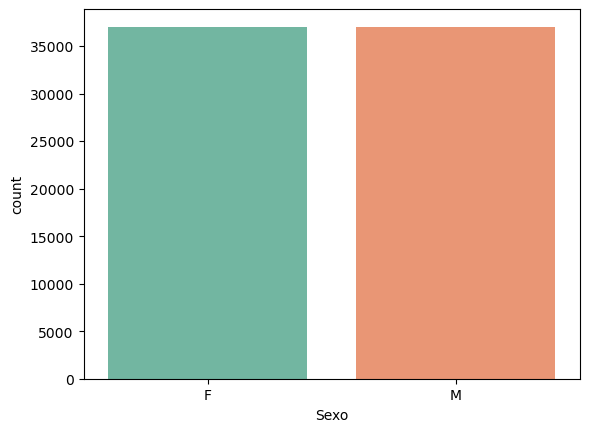

In [275]:
sns.countplot(x=df['Sexo'], color='red', data=df, order=df['Sexo'].value_counts().index, orient='v', palette='Set2')

#### Verificando se possui valores nulos

In [276]:
qtdSexoNulos = df['Sexo'].isnull().sum()
print(f"Quantidade de valores nulos: {qtdSexoNulos}")

Quantidade de valores nulos: 40


In [277]:
df['Sexo'].fillna('Não informado', inplace=True)
qtdSexoNulos = df['Sexo'].isnull().sum()
print(f"Quantidade de valores nulos: {qtdSexoNulos}")

df['Sexo'].value_counts()

Quantidade de valores nulos: 0


F                37030
M                36951
Não informado       40
Name: Sexo, dtype: int64

#### Tratando a coluna 'Campus'
- Desscrição da coluna e gráfico de contagem
- Verificando se possui valores nulos
- Tratando valores nulos
- Distribuição dos dados

#### Desscrição da coluna

In [278]:
df['Campus'].describe()

count     74021
unique        3
top         CAV
freq      60335
Name: Campus, dtype: object

In [279]:
df['Campus'].value_counts()

CAV    60335
CRP     8412
CAF     5274
Name: Campus, dtype: int64

<Axes: xlabel='Campus', ylabel='count'>

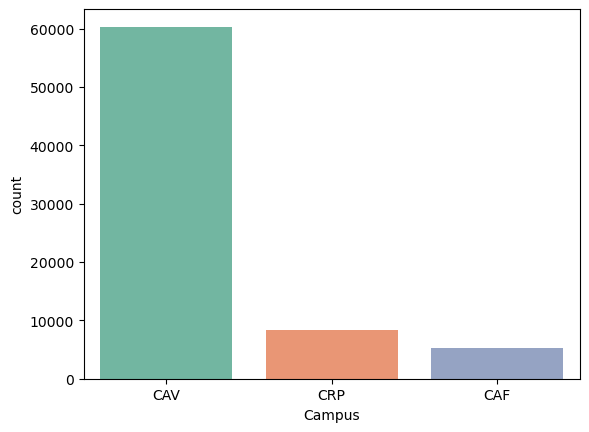

In [280]:
sns.countplot(x=df['Campus'], color='red', data=df, order=df['Campus'].value_counts().index, orient='v', palette='Set2')

#### Verificando se possui valores nulos

In [281]:
qtdCampusNulos = df['Campus'].isnull().sum()
print(f"Quantidade de valores nulos: {qtdCampusNulos}")

Quantidade de valores nulos: 0


#### Tratando valores nulos

In [282]:
print("A coluna 'Campus' não possui valores nulos!")

A coluna 'Campus' não possui valores nulos!


### Tratamento da coluna 'Curso_Identificador'
- Desscrição da coluna e gráfico de contagem
- Verificando se possui valores nulos
- Tratando valores nulos
- Tratando valores irrelevantes

#### Desscrição da coluna

In [283]:
df['Curso_Identificador'].value_counts()

1103    5787
1121    1974
1113    1651
1132    1637
1114    1627
        ... 
1424     243
1154     217
1418     205
2102     160
1423       1
Name: Curso_Identificador, Length: 79, dtype: int64

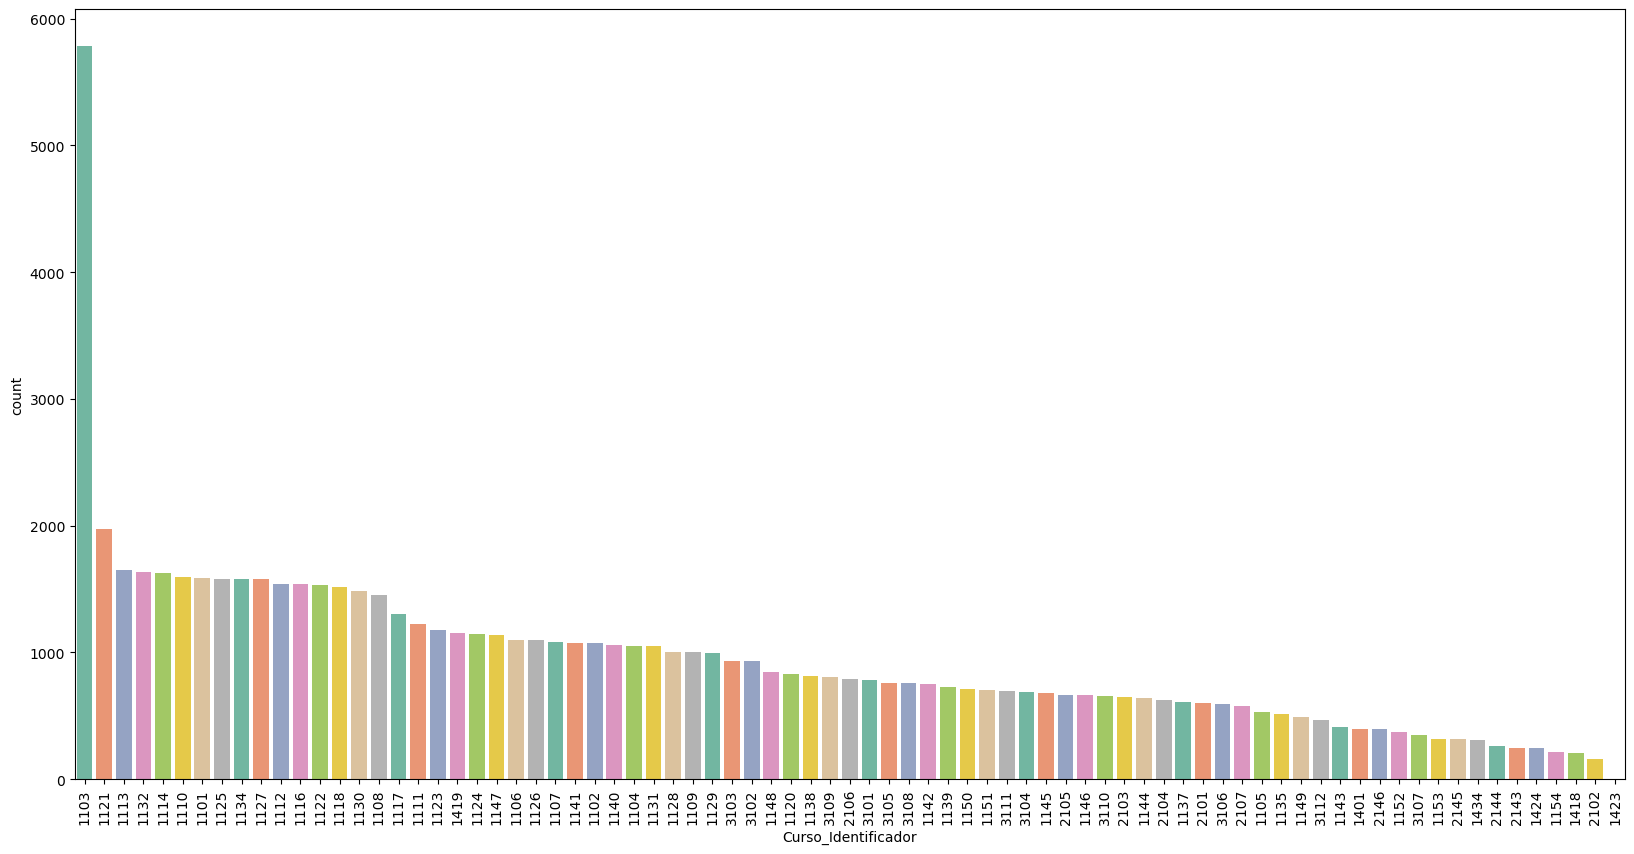

In [284]:
cursosCountPlot = sns.countplot(x=df['Curso_Identificador'], color='red', data=df,
                   order=df['Curso_Identificador'].value_counts().index,
                   orient='v', palette='Set2')

cursosCountPlot.set_xticklabels(cursosCountPlot.get_xticklabels(), rotation=90)
cursosCountPlot.figure.set_size_inches(20, 10)

#### Verificando se possui valores nulos

In [285]:
qtdCursoIdentificadorNulos = df['Curso_Identificador'].isnull().sum()
print(f"Quantidade de valores nulos: {qtdCursoIdentificadorNulos}")

Quantidade de valores nulos: 0


#### Tratando valores nulos

In [286]:
print("A coluna 'Curso_Identificador' não possui valores nulos!")

A coluna 'Curso_Identificador' não possui valores nulos!


#### Tratando valores irrelevantes

In [287]:
# Há um curso que possui apenas 1 aluno, então iremos remover esse curso

# Verificando a linha do curso que possui apenas 1 aluno
display(df[df['Curso_Identificador'] == 1423])

# Removendo o curso
df = df.drop(df[df['Curso_Identificador'] == 1423].index)
print("Curso removido!")

,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
1553,20399,1970.0,M,CAV,1423,CAV - LICENCIATURA EM FISICA,MG,SAO JOAO DO PARAISO,2000/2,2003/1,C,Conclusão ...,Conclusão,NaN,NaN,0,Informação não disponível,75.0


Curso removido!


### Tratando a coluna 'Curso'
- Desscrição da coluna
- Tratamento dos nomes dos cursos
- Verificando se possui valores nulos
- Tratando valores nulos
- Tratando valores irrelevantes



#### Desscrição da coluna

In [294]:
df['Curso'].describe()

count               74020
unique                 92
top       CAV - Agronomia
freq                 5787
Name: Curso, dtype: object

#### Tratamento dos nomes dos cursos

##### Nesta seção foram feitas diversas análises acerca dos nomes dos cursos, comparando com os nomes reais e tratando nomes que estavam incorretos

In [290]:
# Assossiando o identificador do curso ao nome do curso para facilitar a visualização dos dados

cursosDict = dict(zip(df['Curso_Identificador'], df['Curso']))
display(cursosDict)

{1101: 'CAV - Administração',
 1102: 'CAV - Engenharia de Agrimensura e Cartográfica',
 1103: 'CAV - Agronomia',
 1104: 'CAV - Ciências Contábeis',
 1105: 'CAV - Ciências Econômicas - Ênfase em Agronegócio',
 1106: 'CAV - Engenharia Ambiental',
 1107: 'CAV - Engenharia de Produção',
 1108: 'CAV - Ciências Econômicas',
 1109: 'CAV - Economia Doméstica',
 1110: 'CAV - Educação Física',
 1111: 'CAV - Engenharia Agrícola e Ambiental',
 1112: 'CAV - Engenharia Civil',
 1113: 'CAV - Engenharia Florestal',
 1114: 'CAV - Engenharia de Alimentos',
 1116: 'CAV - Medicina Veterinária',
 1117: 'CAV - Nutrição',
 1118: 'CAV - Pedagogia',
 1120: 'CAV - Ciência e Tecnologia de Laticínios',
 1122: 'CAV - Ciências Biológicas',
 1123: 'CAV - Física',
 1124: 'CAV - Matemática',
 1121: 'CAV - Zootecnia',
 1125: 'CAV - Química',
 1127: 'CAV - Direito',
 1128: 'CAV - Arquitetura e Urbanismo',
 1130: 'CAV - Letras',
 1137: 'CAV - Secretariado Executivo Trilíngue, Português, Francês, Inglês',
 1140: 'CAV - Co

In [291]:
# Quantidade de alunos por curso

df['Curso'].value_counts()

CAV - Agronomia                                                       5787
CAV - Administração                                                   1981
CAV - Zootecnia                                                       1974
CAV - Engenharia Florestal                                            1651
CAV - Geografia                                                       1637
                                                                      ... 
CAF - Química - Licenciatura                                            96
CAF - Física - Licenciatura                                             83
CAV - Administração - Habilitação em Administração de Cooperativas      35
CAV - LETRAS                                                            10
CAV - Biologia                                                           1
Name: Curso, Length: 92, dtype: int64

In [292]:
# Ordenando os cursos por ordem alfabética para facilitar a visualização dos dados

dfCurso = df['Curso'].value_counts().sort_index()
dfCurso = pd.DataFrame(dfCurso)
dfCurso = dfCurso.reset_index()
dfCurso.columns = ['Curso', 'Quantidade']
dfCurso


,Curso,Quantidade
0,CAF - Administração,790
1,CAF - Agronomia,651
2,CAF - Ciência da Computação,574
3,CAF - Ciências Biológicas,248
4,CAF - Ciências Biológicas - Licenciatura,145
...,...,...
87,CRP - Química,347
88,CRP - Sistemas de Informação - Integral,516
89,CRP - Sistemas de Informação - Integral ...,172
90,CRP - Sistemas de Informação - Noturno,548


In [293]:
#UFV CAF

# biologicas, fisica, educaçao fisica, quimica
#
# UFV CAV
# A - ADM, Falta- Agronomia
# B - Educação Física, Biologia -> ciencias biologicas,
# C - enfase economia
# E - agrimensura
# G - gestao de cooperativas e agronegocio
# L - LETRAS, licenciatura em edf, EAD e nao EAD, Pedagogia,

# CRP

# integral e noturno errado
